### Immune system model and tests

The final purpose of the project will be to model interactions between the immune system and a tumor. Specifically we want to know what happens when the immune system can not distinguish self from not self (autoimmune diseases).

However the model is bound to be extensive, so we will tackle it step by step. 

In this notebook i will focus on the immune system only and cases where lymphocytes can not distinguish the antigen from the self very well.

Facts of life that are considered in the model (see ImmunitySystem.py) are the following:

<ol>
    <li>Helper cells attract B-Cells, they also release cytokines</li> 
    <li>Helper can not go to places where there are suppressors</li>
    <li>B-Cells work with helper cells to create antibodies which trap the antigen</li> 
    <li>B-Cells can also release cytokines</li>
    <li>Antibodies can be recognized by T-Cells to kill the antigen</li> 
<li>T-Cells will move randomly when inactive but once they reach a place with an antibody they activate </li>
    <li>T-Cells can kill the antigen with some probability</li>
<li> After being active they will use chemotaxis to follow places with high cytokine concentration</li>
<li>Cytokine is created by B-Cells and helper cells, and will dissipate at some rate, this means that T-cells go to places nearby</li> 
    <li>that have been recently detected (they schedule things as in a stack).</li>
    <li>In autoimmune diseases T cells leave cytokines (attack tissue) on places they should not</li>
    <li>The rate of T-Cell generation depends on the number of activated T-Cells</li>
</ol>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ImmunitySystem import ImmuneAutomaton


## Pruebas sistema inmune

In [2]:
automatonWidth = 75
automatonHeight = 75

immuneAutomaton = ImmuneAutomaton(automatonWidth, automatonHeight)

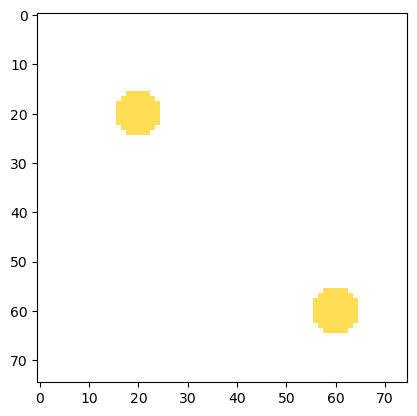

In [3]:
#Initialize the antigen 

centerX = [20,60]
centerY = [20,60]
radius = 5

antigenGrid = np.zeros((automatonHeight, automatonWidth))

for i in range(0,automatonWidth):
    for j in range(0,automatonHeight):
        for s in range(0,len(centerX)):
                dst = np.sqrt((j - centerX[s])**2 + (i - centerY[s])**2)
                if(dst < radius):
                    antigenGrid[i,j] = 1


immuneAutomaton.setAntigenPositions(antigenGrid)

plt.figure()
plt.imshow(immuneAutomaton.getPicture())



100%|███████████████████████████████████████| 1000/1000 [00:27<00:00, 36.62it/s]


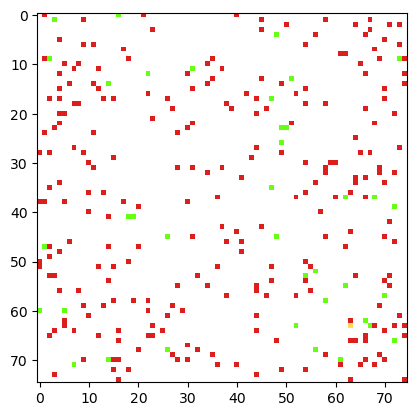

In [4]:
#Evolve the system 
nSteps = 1000
movie = immuneAutomaton.evolveWithMovie(nSteps)
plt.figure()
plt.imshow(immuneAutomaton.getPicture())


In [5]:
#Let's create an animation
import matplotlib.animation as animation
from IPython import display
fig, ax = plt.subplots()

def immuneFrame(i):
    ax.clear()
    ax.imshow(movie[:,:,:,i])

def animateImmuneSystem(movie):
    duration = 20
    nFrames = np.size(movie,3)
    deltaT = (duration/nFrames)*1000
    anim = animation.FuncAnimation(fig, immuneFrame, frames = nFrames, interval = deltaT, blit = False)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

animateImmuneSystem(movie)

### Pruebas sistema autoinmune

In [6]:
automatonWidth = 75
automatonHeight = 75

immuneAutomaton = ImmuneAutomaton(automatonWidth, automatonHeight)

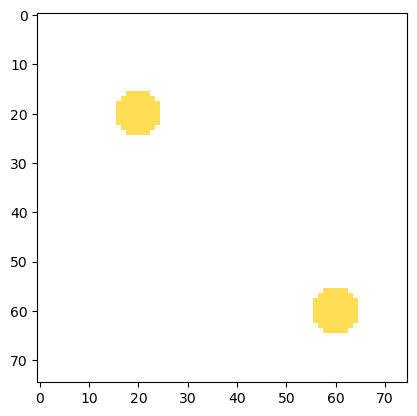

In [7]:
#Initialize the antigen 

centerX = [20,60]
centerY = [20,60]
radius = 5

antigenGrid = np.zeros((automatonHeight, automatonWidth))

for i in range(0,automatonWidth):
    for j in range(0,automatonHeight):
        for s in range(0,len(centerX)):
                dst = np.sqrt((j - centerX[s])**2 + (i - centerY[s])**2)
                if(dst < radius):
                    antigenGrid[i,j] = 1


immuneAutomaton.setAntigenPositions(antigenGrid)

#Activate immune disease
immuneAutomaton.activateImmuneDisease()
immuneAutomaton.rTAttack = 0.1
immuneAutomaton.antigenAffinity = 0.1



plt.figure()
plt.imshow(immuneAutomaton.getPicture())

100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.64it/s]


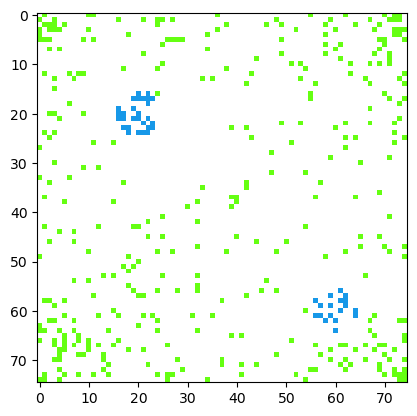

In [8]:
nSteps = 1000
movie = immuneAutomaton.evolveWithMovie(nSteps)
plt.figure()
plt.imshow(immuneAutomaton.getPicture())

In [9]:
fig, ax = plt.subplots()
animateImmuneSystem(movie)